# Libraries & DATA

## 모듈 import

In [2]:
from datetime import datetime, date

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False  # 마이너스
%matplotlib inline

## 데이터 로드

In [3]:
# Load the dataset
mql = pd.read_csv('/kaggle/input/marketing-funnel-olist/olist_marketing_qualified_leads_dataset.csv', parse_dates=['first_contact_date'])
mql.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [4]:
sale = pd.read_csv('/kaggle/input/marketing-funnel-olist/olist_closed_deals_dataset.csv', parse_dates=['won_date'])
sale.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


# EDA

## 데이터 개요 확인

In [5]:
mql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   object        
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   object        
 3   origin              7940 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB


In [6]:
mql.shape

(8000, 4)

In [7]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         842 non-null    object        
 1   seller_id                      842 non-null    object        
 2   sdr_id                         842 non-null    object        
 3   sr_id                          842 non-null    object        
 4   won_date                       842 non-null    datetime64[ns]
 5   business_segment               841 non-null    object        
 6   lead_type                      836 non-null    object        
 7   lead_behaviour_profile         665 non-null    object        
 8   has_company                    63 non-null     object        
 9   has_gtin                       64 non-null     object        
 10  average_stock                  66 non-null     object        
 11  business_type      

In [8]:
sale.shape

(842, 14)

## Marketing Channel 별 유입, 판매량, 전환율 변화?

### Customer Volume 변화

**1. 월별 변화 > Period변수 생성**

In [9]:
mql['period'] = mql['first_contact_date'].dt.to_period('M')
mql.head(3)

,mql_id,first_contact_date,landing_page_id,origin,period
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,2018-02
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,2017-10
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,2018-03


**2.월별 유입**

In [10]:
# pivot groupby period : count mqlid
mql_monthly = pd.DataFrame(mql.groupby(by='period').mql_id.count())
mql_monthly.T.head()

period,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
mql_id,4,239,386,312,416,445,200,1141,1028,1174,1352,1303


Text(0.5, 1.0, 'Monthly MQL Volume')

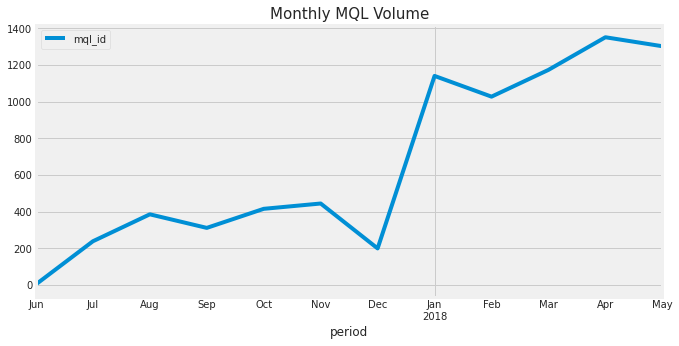

In [11]:
mql_monthly.plot.line(figsize=(10,5))
plt.title('Monthly MQL Volume', fontsize=15)

**2018년을 기점으로 유입의 급격한 성장**

**3. Marketing Channel 마케팅 채널종류 > Origin**

In [12]:
origin_list = mql.groupby('origin').mql_id.count().sort_values(ascending=False).index
origin_list

Index(['organic_search', 'paid_search', 'social', 'unknown', 'direct_traffic',
       'email', 'referral', 'other', 'display', 'other_publicities'],
      dtype='object', name='origin')

**4.Marketing Channel별 유입 수**

In [13]:
# pivot group by origin
mql_origin = pd.pivot_table(mql, index= 'origin', columns='period', values='mql_id', aggfunc='count', fill_value=0 ).reindex(origin_list)
mql_origin

period,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
origin,,,,,,,,,,,,
organic_search,0,54,122,78,125,121,60,412,291,340,349,344
paid_search,0,56,79,64,100,70,35,170,212,262,272,266
social,0,12,45,56,52,95,39,162,156,139,325,269
unknown,1,35,70,39,53,63,25,151,156,186,166,154
direct_traffic,0,16,22,22,23,26,10,82,65,80,75,78
email,1,19,24,23,30,37,12,61,68,74,50,94
referral,0,8,16,12,8,20,9,41,34,38,45,53
other,0,12,3,9,8,3,1,39,16,22,26,11
display,1,19,2,5,5,6,5,11,18,16,19,11


<AxesSubplot:xlabel='period', ylabel='origin'>

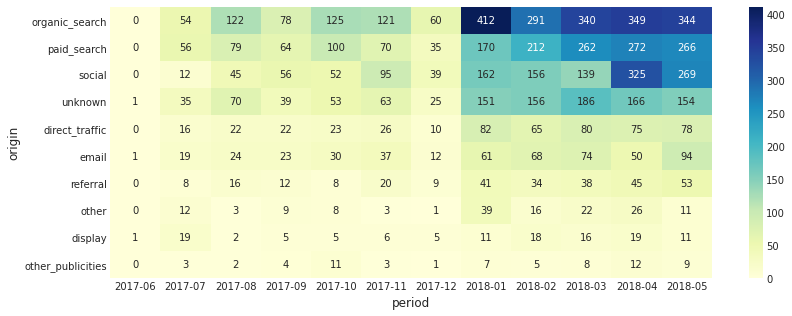

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(mql_origin, annot=True, fmt='g', cmap='YlGnBu')

2018년 성장
- organic_search > paid_search social > unknown 
- paid_search와 social 비슷한 효과를 지님

이전 기간에 대해서도 위의 4개 origin 대부분

### Sales Volume 변화

**1. mql < sale leftjoin : 구매로 이어졌는지 확인하기 위함**

In [15]:
mql_sale = pd.merge(mql, sale, how='left', on='mql_id')
print(mql_sale.shape)
mql_sale.head(2)

(8000, 18)


,mql_id,first_contact_date,landing_page_id,origin,period,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,2018-02,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,2017-10,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2. Purchase or not? > seller_id 존재유무 기준으로 Purchase 변수(0,1) 추가**

In [16]:
# seller id 존재유무로 구매 여부 변수 purchase 추가 - 구매 1  
mql_sale['purchase'] = mql_sale['seller_id'].notna()
mql_sale[['seller_id','purchase']].head(3)

,seller_id,purchase
0,NaN,False
1,NaN,False
2,NaN,False


**3. 월별 주문 수**

In [17]:
# monthly 주문수
# peiod(monthly) boolean 형태의 purchase 구매(1) sum
monthly_sale = pd.DataFrame(mql_sale.groupby('period')['purchase'].sum())
monthly_sale.T

period,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
purchase,0,2,9,7,14,18,11,152,149,167,183,130


Text(0.5, 1.0, 'Monthly Closed deal volume')

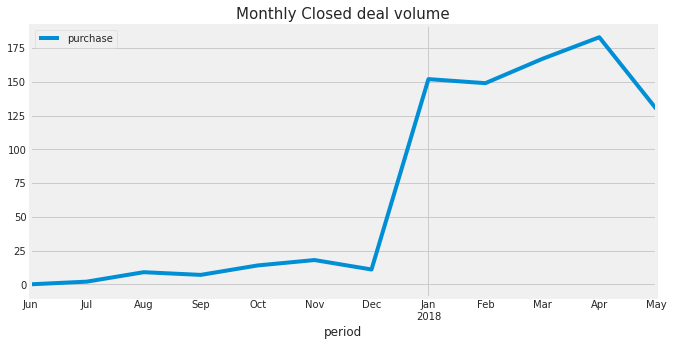

In [18]:
monthly_sale.plot.line(figsize=(10,5))
plt.title('Monthly Closed deal volume', fontsize=15)

**판매량도 동일하게 2018 이후로 급격한 증가**

## Conversion Rate 변화

**전환율 : 유입량 대비 구매량**

In [19]:
# 유입된 customer 수 : count , 구매 횟수 purchse(1) : sum
monthly_conversion = pd.DataFrame(mql_sale.groupby(by='period')['purchase'].agg(['count', 'sum']).rename(columns={'count':'total_customers', 'sum':'sales_volume'}))
monthly_conversion['conversion_rate(%)'] = (monthly_conversion['sales_volume']/monthly_conversion['total_customers'] *100).round(1)
monthly_conversion.T

period,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
total_customers,4.0,239.0,386.0,312.0,416.0,445.0,200.0,1141.0,1028.0,1174.0,1352.0,1303.0
sales_volume,0.0,2.0,9.0,7.0,14.0,18.0,11.0,152.0,149.0,167.0,183.0,130.0
conversion_rate(%),0.0,0.8,2.3,2.2,3.4,4.0,5.5,13.3,14.5,14.2,13.5,10.0


Text(0.5, 1.0, 'Monthly Conversion Rate(%)')

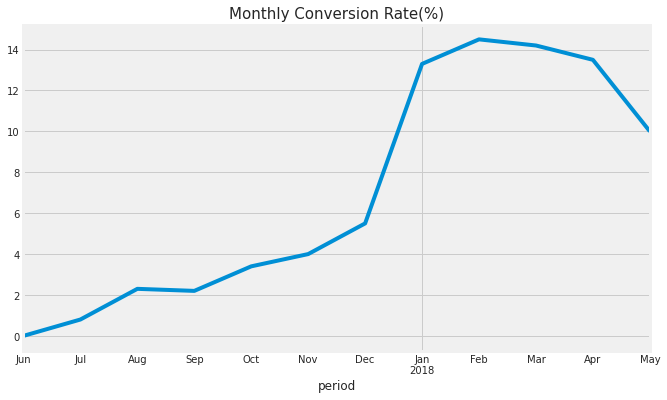

In [20]:
monthly_conversion['conversion_rate(%)'].plot.line(figsize=(10,6))
plt.title('Monthly Conversion Rate(%)', fontsize=15)

## Conversion Rate by Marketing Channel 변화 (유입 volume top 4 origin)

In [21]:
origin_list[0:4]

Index(['organic_search', 'paid_search', 'social', 'unknown'], dtype='object', name='origin')

In [22]:
monthly_origin_conversion = pd.DataFrame(mql_sale.groupby(by=['origin','period'])['purchase'].agg(['count', 'sum'])).rename(columns={'count':'total_customers', 'sum':'sales_volume'})
monthly_origin_conversion['conversion_rate(%)'] = (monthly_origin_conversion['sales_volume']/monthly_origin_conversion['total_customers'] *100).round(1)
monthly_origin_conversion.T

origin             direct_traffic                                          \
period                    2017-07 2017-08 2017-09 2017-10 2017-11 2017-12   
total_customers              16.0    22.0    22.0    23.0    26.0    10.0   
sales_volume                  0.0     0.0     0.0     0.0     0.0     2.0   
conversion_rate(%)            0.0     0.0     0.0     0.0     0.0    20.0   

origin                                              ... unknown          \
period             2018-01 2018-02 2018-03 2018-04  ... 2017-08 2017-09   
total_customers       82.0    65.0    80.0    75.0  ...    70.0    39.0   
sales_volume          18.0     9.0     7.0    13.0  ...     1.0     0.0   
conversion_rate(%)    22.0    13.8     8.8    17.3  ...     1.4     0.0   

origin                                                                      \
period             2017-10 2017-11 2017-12 2018-01 2018-02 2018-03 2018-04   
total_customers       53.0    63.0    25.0   151.0   156.0   186.0   166.0   
sales_volume           3.0     4.0     2.0    33.0    34.0    40.0    35.0   
conversion_rate(%)     5.7     6.3     8.0    21.9    21.8    21.5    21.1   

origin                      
period             2018-05  
total_customers      154.0  
sales_volume          26.0  
conversion_rate(%)    16.9  

[3 rows x 113 columns]

In [23]:
totalperiod= mql_sale['period'].sort_values().unique()
totalperiod

<PeriodArray>
['2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
 '2018-01', '2018-02', '2018-03', '2018-04', '2018-05']
Length: 12, dtype: period[M]

<AxesSubplot:xlabel='origin,period'>

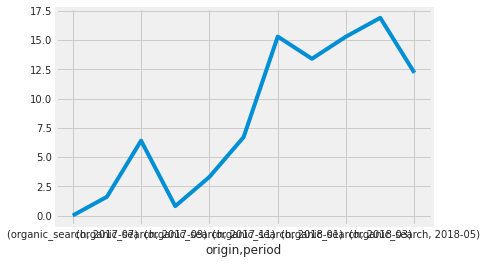

In [47]:
# multiIndex
monthly_origin_conversion.T.filter(regex='organic_search').T['conversion_rate(%)'].plot()

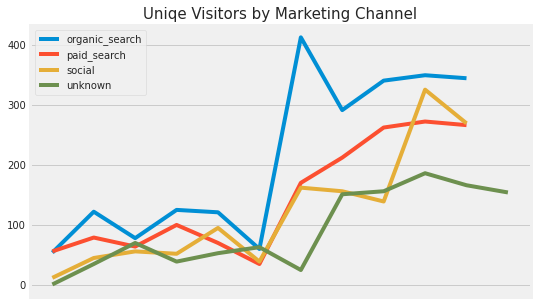

In [25]:
figure, ax = plt.subplots(figsize=(8,5))
monthly_origin_conversion.T.filter(regex='organic_search' ).T['total_customers'].plot(ax=ax)
monthly_origin_conversion.T.filter(regex='paid_search' ).T['total_customers'].plot(ax=ax)
monthly_origin_conversion.T.filter(regex='social' ).T['total_customers'].plot(ax=ax)
monthly_origin_conversion.T.filter(regex='unknown' ).T['total_customers'].plot(ax=ax)
plt.title('Uniqe Visitors by Marketing Channel', fontsize=15)
ax.axes.xaxis.set_visible(False)
ax.legend(['organic_search', 'paid_search', 'social','unknown'])

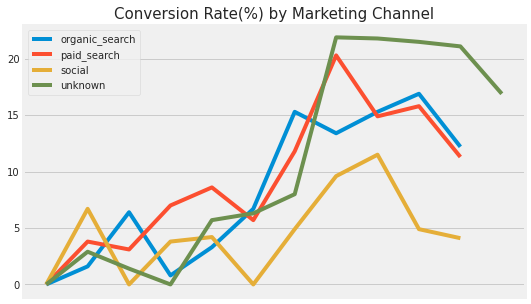

In [26]:
figure, ax = plt.subplots(figsize=(8,5))
monthly_origin_conversion.T.filter(regex='organic_search' ).T['conversion_rate(%)'].plot(ax=ax)
monthly_origin_conversion.T.filter(regex='paid_search' ).T['conversion_rate(%)'].plot(ax=ax)
monthly_origin_conversion.T.filter(regex='social' ).T['conversion_rate(%)'].plot(ax=ax)
monthly_origin_conversion.T.filter(regex='unknown' ).T['conversion_rate(%)'].plot(ax=ax)
plt.title('Conversion Rate(%) by Marketing Channel', fontsize=15)
ax.axes.xaxis.set_visible(False)
ax.legend(['organic_search', 'paid_search', 'social','unknown'])

**Unique visitor수(유입량)는 자연유입(organic research)이 높았지만, 전환율은 유입경로 unknown이 높음**

**Unique visitor수(유입량) social 급증 원인 파악 해당하여 전략세울 수 있음**

**paid search 전환율 급락 원인 파악 필요**

## 구매소요시간 변화

In [27]:
mql_sale['sales_length(day)'] = np.ceil((mql_sale['won_date'] - mql_sale['first_contact_date']).dt.total_seconds() / (60*60*24))
mql_sale.head(3)

,mql_id,first_contact_date,landing_page_id,origin,period,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,purchase,sales_length(day)
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,2018-02,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,2017-10,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,2018-03,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [28]:
mql_sale['seller_id'].notna()

0       False
1       False
2       False
3       False
4        True
        ...  
7995    False
7996    False
7997    False
7998    False
7999     True
Name: seller_id, Length: 8000, dtype: bool

In [29]:
sales_length = mql_sale[mql_sale['purchase']==True][['first_contact_date','sales_length(day)']].reset_index().drop('index', axis=1)
sales_length.head()

,first_contact_date,sales_length(day)
0,2018-02-21,6.0
1,2018-04-04,35.0
2,2018-04-03,64.0
3,2018-01-14,4.0
4,2017-10-09,268.0


In [30]:
sales_length.sort_values(by='first_contact_date', inplace=True)

In [31]:
sales_length[sales_length['first_contact_date'].dt.year.astype(str)=='2017']['sales_length(day)']

699    428.0
179    370.0
204    329.0
712    318.0
605    372.0
       ...  
445     33.0
576    163.0
758    322.0
710     44.0
147    128.0
Name: sales_length(day), Length: 61, dtype: float64

(0.0, 500.0)

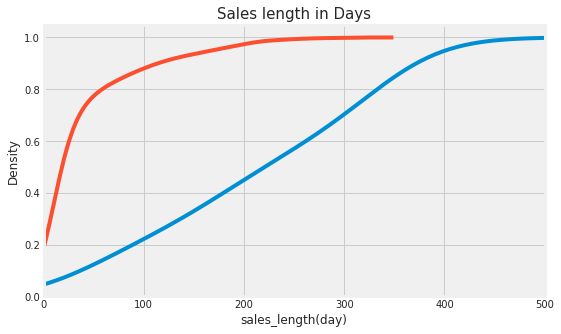

In [32]:
figure, ax = plt.subplots(figsize=(8,5))
sns.kdeplot( sales_length[sales_length['first_contact_date'].dt.year.astype(str)=='2017']['sales_length(day)'] , cumulative=True, ax=ax)
sns.kdeplot( sales_length[sales_length['first_contact_date'].dt.year.astype(str)=='2018']['sales_length(day)'] , cumulative=True, ax=ax)
plt.title('Sales length in Days', fontsize=15)
plt.xlim(0,500)

**2018년에는 구매소요시간의 감소도 있었음**